### 과대적합과 과소적합

![img](images/과대_과소적합-1.png)

#### 과대적합(overfitting)
* 훈련데이터에만 잘 맞고 테스트데이터에는 낮은 정답률

![img](images/과대적합.png)

#### 과소적합(underfitting)
* 훈련이 제대로 이루어지지 않아 테스트 데이터보다 훈련데이터의 정답률이 낮은경우 또는 대체적으로 예측값이 낮은경우
* 훈련데이터의 개수가 적을 경우 과소적합이 일어난다

![img](images/과소적합.png)

### 스케일링
* 수치형 데이터들의 값의 범위가 클 경우 사용한다.(연산 속도 증가)
    - 예를 들어 주식의 가격을 생각했을 경우 100원의 1%와 100000원의 1%를 계산하고자 한다면 같은 1%연산이지만 숫자가 클 경우 연산속도에 영향을 미치게 된다.
* 서로 다른 변수의 값 범위를 일정한 수준으로 맞추고자 하는 경우
* 대표적 스케일링 클래스는 StandardScaler, MinMaxScaler이 있다
* 사용 이유
    - 연산속도를 올릴 수 있다
    - 확률을 높일 수 있다
    - 과대, 과소적합을 조금은 해결할 수 있다
* 참고
    - 이상치가 있을 경우 범위의 차이가 커지게 되므로 이상치는 제거해야 한다
    - RandomForest는 따로 스케일링 할 필요가 없다.(tree계열은 따로 스케일 할 필요가 없다)

#### StandardScaler(label값은 스케일 하지 않는다)
* 사이킷런에서 서포트벡터머신, 선형회귀, 로지스틱 회귀에 적용하는 것이 예측 성능 향상에 중요한 요소가 된다.
* 각 특성의 평균을 0, 편차를 1로 변경하여 정규분포로 만드는 것이다
    - 편차(deviation)는 예측값과 평균의 차이
    > ![image](images/정규분포.png)

#### MinMaxScaler(label값은 스케일 하지 않는다)
* 모든 특성이 정확하게 0과 1사이에 위치하도록 데이터를 변경
* k-means, k-nearest neighbor등의 알고리즘에 좋은 성능을 보인다

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

movie = {'daum':[2,4,6,8,10], 'naver':[1,2,3,4,5]}
mv = pd.DataFrame(movie)
mv

,daum,naver
0,2,1
1,4,2
2,6,3
3,8,4
4,10,5


In [5]:
standard_scaler = StandardScaler()
scaled = standard_scaler.fit_transform( mv )
df_sc = pd.DataFrame( data=scaled, columns=['daum','naver'])
df_sc

,daum,naver
0,-1.414214,-1.414214
1,-0.707107,-0.707107
2,0.000000,0.000000
3,0.707107,0.707107
4,1.414214,1.414214


In [6]:
df_sc.describe()

,daum,naver
count,5.000000,5.000000
mean,0.000000,0.000000
std,1.118034,1.118034
min,-1.414214,-1.414214
25%,-0.707107,-0.707107
50%,0.000000,0.000000
75%,0.707107,0.707107
max,1.414214,1.414214


In [7]:
from sklearn.preprocessing import MinMaxScaler
mv

,daum,naver
0,2,1
1,4,2
2,6,3
3,8,4
4,10,5


In [8]:
min_max_scaler = MinMaxScaler()
min_max_mv = min_max_scaler.fit_transform(mv)
min_max_mv

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [0.75, 0.75],
       [1.  , 1.  ]])

#### 스케일링

In [9]:
df = pd.read_csv("data/bank_cleaning.csv")
df.head()

,age,duration,campaign,pdays,previous,y
0,56,261,1,999,0,0
1,57,149,1,999,0,0
2,37,226,1,999,0,0
3,40,151,1,999,0,0
4,56,307,1,999,0,0


In [10]:
df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'y'], dtype='object')

In [11]:
features = ['age', 'duration', 'campaign', 'pdays', 'previous' ]
label = 'y'
X, y = df[features], df[label]
X, y

(       age  duration  campaign  pdays  previous
 0       56       261         1    999         0
 1       57       149         1    999         0
 2       37       226         1    999         0
 3       40       151         1    999         0
 4       56       307         1    999         0
 ...    ...       ...       ...    ...       ...
 41183   73       334         1    999         0
 41184   46       383         1    999         0
 41185   56       189         2    999         0
 41186   44       442         1    999         0
 41187   74       239         3    999         1
 
 [41188 rows x 5 columns],
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 41183    1
 41184    0
 41185    0
 41186    1
 41187    0
 Name: y, Length: 41188, dtype: int64)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
            train_test_split( X, y, test_size=0.3 )

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit( X_train, y_train )
print( rfc.score(X_train, y_train) )
print( rfc.score(X_test, y_test) )

0.9908778745100759
0.890507404709881


In [15]:
scaled = StandardScaler()
scaled.fit( X_train )

X_train_scaler = scaled.transform( X_train )
X_test_scaler = scaled.transform( X_test )

rfc.fit( X_train_scaler, y_train ) 

print( rfc.score(X_train_scaler, y_train) )
print( rfc.score(X_test_scaler, y_test) )

0.9909472442856647
0.8895362952172857


In [16]:
scaled = MinMaxScaler()
scaled.fit( X_train )

X_train_scaler = scaled.transform( X_train )
X_test_scaler = scaled.transform( X_test )

rfc.fit( X_train_scaler, y_train )

print( rfc.score(X_train_scaler, y_train) )
print( rfc.score(X_test_scaler, y_test) )

0.9909472442856647
0.8897790725904345


### 상관관계
* 특정 변수들 끼리의 관계가 높은값을 제거하면 과적합을 줄일 수 있다

In [21]:
df.head()

,age,duration,campaign,pdays,previous,y
0,56,261,1,999,0,0
1,57,149,1,999,0,0
2,37,226,1,999,0,0
3,40,151,1,999,0,0
4,56,307,1,999,0,0


In [17]:
df.corr()

,age,duration,campaign,pdays,previous,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,0.230181
y,0.030399,0.405274,-0.066357,-0.324914,0.230181,1.000000


<AxesSubplot:>

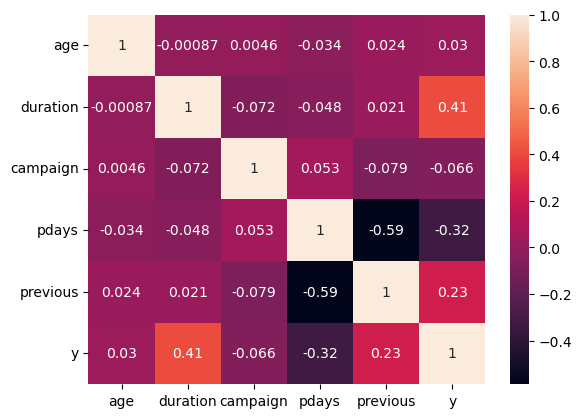

In [20]:
import seaborn as sns
sns.heatmap( df.corr(), annot=True )

In [22]:
df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'y'], dtype='object')

In [23]:
features = ['age', 'campaign', 'pdays', 'previous' ]
label = "y"

X, y = df[features] , df[label]

X_train, X_test, y_train, y_test =\
            train_test_split(X, y, test_size=0.3)

rfc.fit( X_train, y_train )

print( rfc.score(X_train, y_train) )
print( rfc.score(X_test, y_test) )

0.9115188512365162
0.8935016589787165


In [24]:
scaled = StandardScaler()
scaled.fit( X )
X_scaler = scaled.transform( X )

X_train, X_test, y_train, y_test = \
            train_test_split( X_scaler, y , test_size=0.3)

rfc.fit( X_train, y_train )

print( rfc.score(X_train, y_train ) )
print( rfc.score(X_test, y_test ) )

0.9130796711872637
0.8905883305009307


### 타이타닉 스케일 test

In [25]:
df = pd.read_csv('data/titanic_cleaning.csv')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500


In [26]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [28]:
features = [ 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare']
label = "Survived"

X, y = df[features], df[label]

#### standardScaler

In [29]:
standard_s = StandardScaler()
standard_s.fit( X )
X_standard = standard_s.transform( X )

#### min-max-scaler

In [30]:
min_max_s = MinMaxScaler()
min_max_s.fit( X )
X_min_max = min_max_s.transform( X )

#### 훈련 및 테스트 데이터 분리

In [31]:
# 스케일 없는 데이터
X_train, X_test, y_train, y_test =\
                train_test_split(X, y, test_size=0.2 )

#standard scaler
X_train_s, X_test_s, y_train_s, y_test_s =\
                train_test_split(X_standard, y, test_size=0.2 )

#min max scaler
X_train_m, X_test_m, y_train_m, y_test_m =\
                train_test_split(X_min_max , y, test_size=0.2 )

### 모델 생성 및 평가

#### svc-linear 모델

In [33]:
from sklearn.svm import SVC

svc_linear = SVC(kernel="linear")

svc_linear.fit( X_train, y_train )

# 스케일 없는 데이터 셋
print("train : ", svc_linear.score( X_train ,y_train) )
print("test : ", svc_linear.score( X_test ,y_test) )

train :  0.7851123595505618
test :  0.7932960893854749


#### 스텐다드

In [34]:
svc_linear = SVC(kernel="linear")

svc_linear.fit( X_train_s, y_train_s )

# 스케일 없는 데이터 셋
print("train : ", svc_linear.score( X_train_s ,y_train_s) )
print("test : ", svc_linear.score( X_test_s ,y_test_s) )

train :  0.776685393258427
test :  0.8268156424581006


#### 민맥스

In [35]:
svc_linear = SVC(kernel="linear")

svc_linear.fit( X_train_m, y_train_m )

# 스케일 없는 데이터 셋
print("train : ", svc_linear.score( X_train_m ,y_train_m) )
print("test : ", svc_linear.score( X_test_m ,y_test_m) )

train :  0.7907303370786517
test :  0.770949720670391
